<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

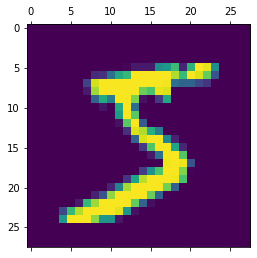

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 776us/step - loss: 0.4700 - accuracy: 0.8754
Epoch 2/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.2837 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 757us/step - loss: 0.2667 - accuracy: 0.9253


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 693us/step - loss: 0.2712 - accuracy: 0.9244


[0.2712204158306122, 0.9243999719619751]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 583us/step


array([2.6703093e-02, 3.4216356e-07, 6.4244777e-02, 9.6265101e-01,
       1.4574162e-03, 1.2203120e-01, 1.3624904e-06, 9.9981219e-01,
       8.8735349e-02, 6.0781151e-01], dtype=float32)

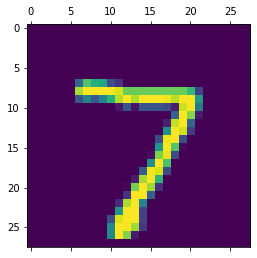

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    9,  920,   19,    6,    5,   11,   12,   38,    4],
       [   4,    0,   18,  922,    0,   27,    2,   10,   19,    8],
       [   2,    2,    7,    2,  894,    0,   10,    5,    7,   53],
       [  11,    2,    3,   29,    6,  786,   13,    8,   27,    7],
       [  17,    3,    7,    1,    7,   12,  908,    2,    1,    0],
       [   1,    6,   22,    6,    2,    0,    0,  960,    1,   30],
       [  10,   11,    6,   27,    8,   31,    9,   14,  851,    7],
       [  11,    7,    1,   11,   14,    8,    0,   33,    3,  921]])>

Text(69.0, 0.5, 'Truth')

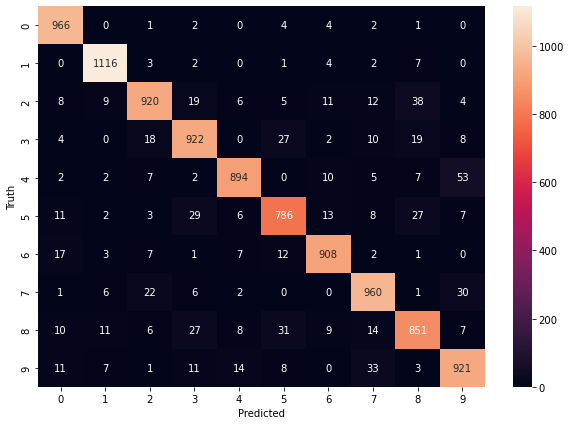

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1205 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.0842 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0505 - accuracy: 0.9845


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 804us/step - loss: 0.0840 - accuracy: 0.9758


[0.08395356684923172, 0.9757999777793884]

313/313 [==============================] - 0s 705us/step


Text(69.0, 0.5, 'Truth')

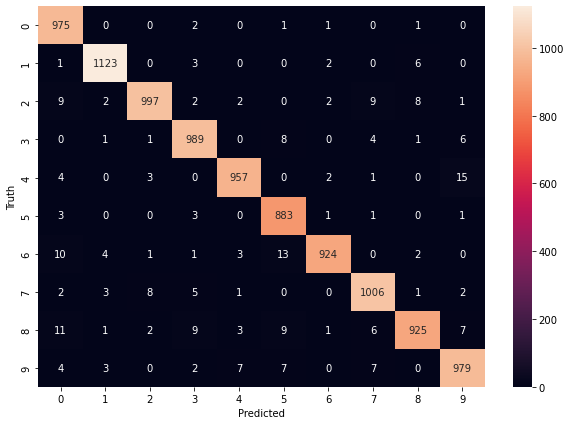

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2759 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 969us/step - loss: 0.1244 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.0525 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.0432 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0296 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 916us/step - loss: 0.0849 - accuracy: 0.9770


[0.0848565399646759, 0.9769999980926514]

In [28]:
model.save_weights("model.h5")